# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [5]:
# Check the distribution of the target variable 'fraud'
fraud['fraud'].value_counts(normalize=True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

Yes, the dataset is imbalance

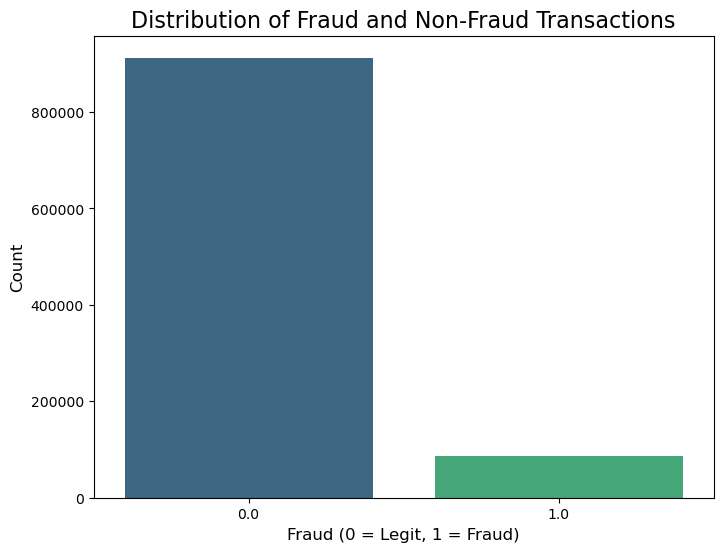

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the instances of each class (fraud=0 and fraud=1)
class_counts = fraud['fraud'].value_counts()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Add labels and title
plt.title("Distribution of Fraud and Non-Fraud Transactions", fontsize=16)
plt.xlabel("Fraud (0 = Legit, 1 = Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()


In [8]:
#Train a Logistic Regression model.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into features (X) and target (y)
X = fraud.drop(columns='fraud')
y = fraud['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [9]:
#Evaluate your model.
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[181280   1277]
 [  6995  10448]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



In [10]:
# Run Oversample (Random Over Sampling) to balance the target variable.

from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train a logistic regression model on the oversampled data
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_ros = model.predict(X_test)

# Evaluate the oversampled model
print("Confusion Matrix after Oversampling:")
print(confusion_matrix(y_test, y_pred_ros))

print("\nClassification Report after Oversampling:")
print(classification_report(y_test, y_pred_ros))


Confusion Matrix after Oversampling:
[[170346  12211]
 [   851  16592]]

Classification Report after Oversampling:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [11]:
#Run Undersample (Random Under Sampling) to balance the target variable.

from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train a logistic regression model on the undersampled data
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_rus = model.predict(X_test)

# Evaluate the undersampled model
print("Confusion Matrix after Undersampling:")
print(confusion_matrix(y_test, y_pred_rus))

print("\nClassification Report after Undersampling:")
print(classification_report(y_test, y_pred_rus))


Confusion Matrix after Undersampling:
[[170296  12261]
 [   841  16602]]

Classification Report after Undersampling:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [12]:
#Run SMOTE to balance the target variable.

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a logistic regression model on the SMOTE data
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_smote = model.predict(X_test)

# Evaluate the SMOTE model
print("Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))

print("\nClassification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))


Confusion Matrix after SMOTE:
[[170447  12110]
 [   872  16571]]

Classification Report after SMOTE:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

